### Задание практическое по Pandas 

In [2]:
import numpy as np
import pandas as pd

In [25]:
df = pd.read_csv('products.csv')
df

,Date,Store,Product,Sales,Expenses,City
0,2023-10-01,A,Product1,500,200,New York
1,2023-10-01,B,Product2,800,300,Los Angeles
2,2023-10-02,A,Product1,600,250,New York
3,2023-10-02,B,Product2,750,280,Los Angeles
4,2023-10-03,A,Product1,550,220,New York
5,2023-10-03,B,Product2,900,350,Los Angeles
6,2023-10-01,C,Product1,700,280,San Francisco
7,2023-10-01,C,Product2,950,350,San Francisco
8,2023-10-02,C,Product1,600,240,San Francisco
9,2023-10-02,C,Product2,850,320,San Francisco


1) Проведите предварительный анализ данных: 

выведите первые несколько строк таблицы, определите, какие столбцы есть в наборе данных, и проверьте наличие пропущенных значений.

In [26]:
df.head(5)

,Date,Store,Product,Sales,Expenses,City
0,2023-10-01,A,Product1,500,200,New York
1,2023-10-01,B,Product2,800,300,Los Angeles
2,2023-10-02,A,Product1,600,250,New York
3,2023-10-02,B,Product2,750,280,Los Angeles
4,2023-10-03,A,Product1,550,220,New York


In [27]:
df.columns

Index(['Date', 'Store', 'Product', 'Sales', 'Expenses', 'City'], dtype='object')

In [28]:
df.isnull()

# видим, что пропущенных значений нет 

,Date,Store,Product,Sales,Expenses,City
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


2) Рассчитайте общую сумму продаж (столбец 'Sales') для каждого магазина.

In [29]:
df.groupby('Store').sum()['Sales']

# это получился Series Object 

Store
A    1650
B    2450
C    4850
Name: Sales, dtype: int64

3) Определите, какой магазин совершил наибольшую продажу, и выведите информацию о этом магазине.

In [30]:
sales = df.groupby('Store').sum()['Sales']
ind_max = sales.idxmax() # индекс максимума 
max_sales = sales[ind_max] # значение максимума по этому индексу 
print(ind_max, max_sales)

C 4850


4) Найдите среднюю цену продукта во всех магазинах.

In [31]:
df.groupby(['Store', 'Product']).mean()['Sales'].round(2)

Store  Product 
A      Product1    550.00
B      Product2    816.67
C      Product1    683.33
       Product2    933.33
Name: Sales, dtype: float64

5) Создайте новый столбец, который будет содержать информацию о прибыли (продажи минус затраты) для каждой продажи.

In [32]:
df['Profit'] = df['Sales'] - df['Expenses']
df

,Date,Store,Product,Sales,Expenses,City,Profit
0,2023-10-01,A,Product1,500,200,New York,300
1,2023-10-01,B,Product2,800,300,Los Angeles,500
2,2023-10-02,A,Product1,600,250,New York,350
3,2023-10-02,B,Product2,750,280,Los Angeles,470
4,2023-10-03,A,Product1,550,220,New York,330


6) Определите, какой продукт принес наибольшую прибыль, и выведите информацию о нем.

In [36]:
id_max = df['Profit'].idxmax()
df.iloc[id_max]

Date           2023-10-01
Store                   C
Product          Product2
Sales                 950
Expenses              350
City        San Francisco
Profit                600
Name: 7, dtype: object

7) Посчитайте суммарную прибыль для каждого магазина и определите магазин с наибольшей суммарной прибылью.

In [37]:
df.groupby('Store').sum()['Profit']

Store
A     980
B    1520
C    2970
Name: Profit, dtype: int64

In [39]:
profit_series = df.groupby('Store').sum()['Profit']
ind_max = profit_series.idxmax()
print(ind_max, profit_series[ind_max])

C 2970


8) Рассчитайте среднюю прибыль для каждого города (если есть информация о городах) и определите город с наибольшей средней прибылью.

In [42]:
df.groupby('City').mean()['Profit'].round(3)

City
Los Angeles      506.667
New York         326.667
San Francisco    495.000
Name: Profit, dtype: float64

In [43]:
city_series = df.groupby('City').mean()['Profit'].round(3)
ind_max = city_series.idxmax()
print(ind_max, city_series[ind_max])

Los Angeles 506.667


## Объединение датафреймов 

## Конкатенация 

Когда оба датафрейма имеют одинаковый формат (оба csv или другой), то их очень просто объединить  через конкатенацию pd.concat()

2 вида конкатенации:

-- Конкатенация по колонкам (строки в 2 датафреймах должны быть одинаковые)

-- Конкатенация по строкам (одинаковые колонки дб у 2х датафреймов)

In [2]:
import numpy as np
import pandas as pd

In [45]:
data_one = {'A': ['A0', 'A1', 'A2', 'A3'], 'B': ['B0', 'B1', 'B2', 'B3']}

data_two = {'C': ['C0', 'C1', 'C2', 'C3'], 'D': ['D0', 'D1', 'D2', 'D3']}

df_one = pd.DataFrame(data_one)
df_two = pd.DataFrame(data_two)

In [46]:
df_one

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


In [47]:
df_two

,C,D
0,C0,D0
1,C1,D1
2,C2,D2
3,C3,D3


Объединение датафреймов с одинаковыми индексами (строками) [по колонкам]

In [49]:
pd.concat([df_one, df_two], axis = 1)

# указываем axis = 1, что значит по колонкам 

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [50]:
pd.concat([df_two, df_one], axis = 1)

# важен порядок, в ктр мы указываем датафреймы 

,C,D,A,B
0,C0,D0,A0,B0
1,C1,D1,A1,B1
2,C2,D2,A2,B2
3,C3,D3,A3,B3


Объединение датафреймов по строкам (когда имеем одинаковые колонки)

In [51]:
pd.concat([df_one, df_two], axis = 0)

# недостающие значения автоматически проставаться NaN

,A,B,C,D
0,A0,B0,NaN,NaN
1,A1,B1,NaN,NaN
2,A2,B2,NaN,NaN
3,A3,B3,NaN,NaN
0,NaN,NaN,C0,D0
1,NaN,NaN,C1,D1
2,NaN,NaN,C2,D2
3,NaN,NaN,C3,D3


Но если колонки НЕ одинаковые, но мы хотим именно по строкам объединить данные, то мж переименовать колонки в одном из датафрейме

In [52]:
df_two.columns = df_one.columns

In [53]:
df_two

,A,B
0,C0,D0
1,C1,D1
2,C2,D2
3,C3,D3


In [54]:
pd.concat([df_one, df_two], axis = 0)

# теперь получилась красивая конкатенация по строкам 

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3
0,C0,D0
1,C1,D1
2,C2,D2
3,C3,D3


Но мы видим, что индексы повторяются, а мы хотим сделать их уникальными - для этого создадим новый df

In [55]:
df_three = pd.concat([df_one, df_two], axis = 0) 

df_three.index = range(len(df_three))

df_three

,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3
4,C0,D0
5,C1,D1
6,C2,D2
7,C3,D3


## MERGE

Если дф имеют разный формат, то их нельзя объединить с помощью конкатенации - здесь уже применяем слияние -> merge 

Эта операция аналогична операции JOIN в SQL 

pd.merge() имеет параметр how, ктр мб равен:
- inner
- outer
- left/right

(в зависимости от того, что делать с информацией, ктр есть только в одном из дата фреймов)

pd.merge() также имеет параметр on - по какому столбцу производим объединение таблиц;

этот столбец должен быть первичным ключом (то есть все строки уникальны) и должен присутствовать в обеих таблицах 

how = 'inner' -> берем только те строки, ктр есть сразу в обеих таблицах 

pd.merge(table1, table2, how = 'inner', on = 'name')

### INNER JOIN 

In [3]:
registrations = pd.DataFrame({'reg_id':[1,2,3,4],'name':['Andrew','Bobo','Claire','David']})

logins = pd.DataFrame({'log_id':[1,2,3,4],'name':['Xavier','Andrew','Yolanda','Bobo']})

In [4]:
registrations

,reg_id,name
0,1,Andrew
1,2,Bobo
2,3,Claire
3,4,David


In [5]:
logins

,log_id,name
0,1,Xavier
1,2,Andrew
2,3,Yolanda
3,4,Bobo


In [6]:
pd.merge(registrations, logins, how = 'inner', on = 'name')

# объединили 2 датафрейма 
# причем для метода inner НЕ важен порядок таблиц 

,reg_id,name,log_id
0,1,Andrew,2
1,2,Bobo,4


!!! Если названия колонок в датафреймах не совпадают, то вместо параметра ON нужно использовать параметры left_on и right_on, чтобы отдельно указать названия колонок для левой таблицы и правой таблицы

pd.merge(registration, logins, how='inner', left_on='name', right_on='names')

### LEFT/RIGHT JOIN 

Здесь ВАЖЕН порядок таблиц!

если how = 'left', то берем все строки из левой таблицы -> и те, ктр совпадают по ключам с правой, и те, что не совпадают (тогда на пропусках ставится NaN)

eсли how = 'right', то все наоборот -> берем все строки из правой таблицы

In [8]:
pd.merge(left = registrations, right = logins, how = 'left', on = 'name')

# левое объединение 

,reg_id,name,log_id
0,1,Andrew,2.0
1,2,Bobo,4.0
2,3,Claire,NaN
3,4,David,NaN


In [9]:
pd.merge(left = registrations, right = logins, how = 'right', on = 'name')

# правое объединение 

,reg_id,name,log_id
0,NaN,Xavier,1
1,1.0,Andrew,2
2,NaN,Yolanda,3
3,2.0,Bobo,4


### OUTER JOIN 

в итоговое объединение попадают все строки из 2 таблиц, и те, что совпадают, и те, что не сопадают 

там, где нужно расставляются NaN 

порядок НЕ важен при указании таблиц 

In [10]:
pd.merge(registrations, logins, how = 'outer', on = 'name')

,reg_id,name,log_id
0,1.0,Andrew,2.0
1,2.0,Bobo,4.0
2,3.0,Claire,NaN
3,4.0,David,NaN
4,NaN,Xavier,1.0
5,NaN,Yolanda,3.0


### Объединение df по индексам (не по колонкам) через merge

In [11]:
registrations

,reg_id,name
0,1,Andrew
1,2,Bobo
2,3,Claire
3,4,David


In [12]:
registrations = registrations.set_index('name')
registrations

,reg_id
name,
Andrew,1
Bobo,2
Claire,3
David,4


In [14]:
pd.merge(registrations, logins, left_index = True, right_on = 'name', how = 'inner')

# объединение по индексу левому и правой колонке Name

,reg_id,log_id,name
1,1,2,Andrew
3,2,4,Bobo


### Объединение, если колонки называются по-разному

In [15]:
registrations = registrations.reset_index() # сброс индекса 
registrations

,name,reg_id
0,Andrew,1
1,Bobo,2
2,Claire,3
3,David,4


In [16]:
registrations.columns = ['reg_name', 'reg_id']
# переименовываем колонку имени 
registrations

,reg_name,reg_id
0,Andrew,1
1,Bobo,2
2,Claire,3
3,David,4


In [17]:
pd.merge(registrations, logins, how='inner', left_on = 'reg_name', right_on = 'name')

# но тут останутся обе колонки объединения, хотя они содержат те же знач

,reg_name,reg_id,log_id,name
0,Andrew,1,2,Andrew
1,Bobo,2,4,Bobo


In [18]:
# но мы можем сделать удаление с помощью drop

rez = pd.merge(registrations, logins, how='inner', left_on = 'reg_name', right_on = 'name')
rez.drop('reg_name', axis = 1) # удаляем колонку лишнюю 

,reg_id,log_id,name
0,1,2,Andrew
1,2,4,Bobo


### Работа с дубликатами колонок 

In [19]:
registrations.columns = ['name', 'id']
logins.columns = ['id', 'name']

In [20]:
registrations

,name,id
0,Andrew,1
1,Bobo,2
2,Claire,3
3,David,4


In [22]:
logins

,id,name
0,1,Xavier
1,2,Andrew
2,3,Yolanda
3,4,Bobo


In [23]:
pd.merge(registrations, logins, how = 'inner', on = 'name')

# Pandas автоматически переименует колонки с одинаковыми названиями
# причем для левой будет суффикс _x, для правой - _y

,name,id_x,id_y
0,Andrew,1,2
1,Bobo,2,4


In [24]:
# Но если мы хотим свои суффиксы для лучшего понимания
# то для этого есть спец параметр 

pd.merge(registrations, logins, how = 'inner', on = 'name', suffixes = ('_reg', '_log'))

,name,id_reg,id_log
0,Andrew,1,2
1,Bobo,2,4


## Методы для обработки текста 

In [25]:
import numpy as np
import pandas as pd

In [26]:
email = 'nastius@yandex.ru'

In [27]:
email.split('@')

['nastius', 'yandex.ru']

In [28]:
# создадим объект Series

names = pd.Series(['andrew', 'bobo', 'claire', 'david', '5'])

names

# строки в Pandas - это тип object (в новых версиях хотят сделать StringDType)

0    andrew
1      bobo
2    claire
3     david
4         5
dtype: object

In [29]:
# делаем все внутренние строки большими 

names.str.upper()

0    ANDREW
1      BOBO
2    CLAIRE
3     DAVID
4         5
dtype: object

Все методы доступные для обычных строк Питон - доступны и для строк в Pandas -> через `<pandas object>.str.<str function>`

In [30]:
names.str.isdigit()

0    False
1    False
2    False
3    False
4     True
dtype: bool

так как тут получился Series из True/False, то это впоследствии мж испольовать для conditional filtering 

In [32]:
tech_finance = ['GOOG,APPL,AMZN', 'JPN,BAC,GS']
tickers = pd.Series(tech_finance)
tickers

0    GOOG,APPL,AMZN
1        JPN,BAC,GS
dtype: object

In [33]:
tickers.str.split(',')

0    [GOOG, APPL, AMZN]
1        [JPN, BAC, GS]
dtype: object

In [34]:
tickers.str.split(',').str[0]

# то есть получили по 1 элементу для каждого из списков
# s.split(',')[0] - это синтаксис для обычного Питона 

0    GOOG
1     JPN
dtype: object

In [35]:
# получение df из исходного объекта Series
# где значениями колонок будут разделенные строки 

tickers.str.split(',', expand = True)

,0,1,2
0,GOOG,APPL,AMZN
1,JPN,BAC,GS


In [36]:
# создадим Series c ошибками в строках 
messy_names = pd.Series(['andrew  ', 'bo:bo', '  claire  '])
messy_names

0      andrew  
1         bo:bo
2      claire  
dtype: object

Хотим сделать эти данные красивыми - применим несколько строковых методов сразу 

In [40]:
# сначала убираем ':', потом пробелы, потом делаем букву первую заглавной 

messy_names.str.replace(':', '').str.strip().str.capitalize()

0    Andrew
1      Bobo
2    Claire
dtype: object

Если нет нужного строкового метода, то всегда можем применить apply() для собственной функции

In [41]:
def clean_up(name):
    name = name.replace(':', '')
    name = name.strip()
    name = name.capitalize()
    return name

In [42]:
messy_names.apply(clean_up)

0    Andrew
1      Bobo
2    Claire
dtype: object

Какой из вариантов более эффективный? Применять встроенные методы строк Pandas или через apply()?

Ответим на этот вопрос через timeit

In [43]:
import timeit

setup = '''
import numpy as np
import pandas as pd 
messy_names = pd.Series(['andrew  ', 'bo:bo', '  claire  '])
def clean_up(name):
    name = name.replace(':', '')
    name = name.strip()
    name = name.capitalize()
    return name
'''

statem_1 = '''
messy_names.str.replace(':', '').str.strip().str.capitalize()
'''

statem_2 = '''
messy_names.apply(clean_up)
'''

statem_3 = '''
np.vectorize(clean_up)(messy_names)
'''

In [44]:
timeit.timeit(setup = setup, stmt = statem_1, number = 10000)

3.440968900000371

In [45]:
timeit.timeit(setup = setup, stmt = statem_2, number = 10000)

1.041928700000426

In [46]:
timeit.timeit(setup = setup, stmt = statem_3, number = 10000)

0.2899133000000802

Итог: для повышения производительности лучше использовать свои собственные функции через векторизацию (np.vectorize()) ! 

## Методы для работы с датой и временем 

В Питоне есть объект datetime для хранения информации о дате и времени 

В Pandas также можно работать с этими объектами 

In [47]:
from datetime import datetime

In [50]:
# создадим свою дату

year = 2023
month = 11
day = 12
hour = 6
mins = 42
sec = 56

my_date = datetime(year, month, day)
my_date

datetime.datetime(2023, 11, 12, 0, 0)

In [52]:
my_datetime = datetime(year, month, day, hour, mins, sec)
my_datetime

datetime.datetime(2023, 11, 12, 6, 42, 56)

In [53]:
my_datetime.year

2023

In [57]:
my_ser = pd.Series(['Nov 11, 2021', '2030-02-24', None])
my_ser

0    Nov 11, 2021
1      2030-02-24
2            None
dtype: object

In [58]:
# преобразование строки в формат дата -> to_datetime()

pd.to_datetime(my_ser)

0   2021-11-11
1   2030-02-24
2          NaT
dtype: datetime64[ns]

In [59]:
time_ser = pd.to_datetime(my_ser)

time_ser[0]

# видим, что теперь каждый объект Series есть Timestamp
# а значит, что мж извлекать отдельные части из даты 

Timestamp('2021-11-11 00:00:00')

In [60]:
time_ser[0].month

11

In [62]:
data_1 = '31-12-2020'
pd.to_datetime(data_1)

Timestamp('2020-12-31 00:00:00')

In [63]:
data_2 = '10-12-2034'
pd.to_datetime(data_2)

Timestamp('2034-10-12 00:00:00')

In [66]:
pd_data_1 = pd.to_datetime(data_1)
pd_data_1.day

31

In [67]:
pd_data_2 = pd.to_datetime(data_2)
pd_data_2.day

12

То есть во 2 примере Pandas распознает второе число как день в дате, а не первое, как мы этого ожидаем (это американский формат даты) 

В 1 примере то, что первое число это день сомнений не было, так как такого месяца не существует, поэтому pandas распознал 

Чтобы такого диссонанса не было, то надо указывать этот нюанс отдельным аргументом -> dayfirst = True 

In [68]:
data_2 = '10-12-2034'
pd.to_datetime(data_2, dayfirst = True)

Timestamp('2034-12-10 00:00:00')

In [69]:
pd.to_datetime(data_2, dayfirst = True).day

10

MAIN: чтобы не запутаться с форматом данных (евпрпейским или американским), то надо следить за тем, чтобы даты были в одном формате 

то есть при слиянии датафреймов следить за этим моментом! 

### Форматирование TimeStamp

In [71]:
style_date = '22--Dec--2097'

pd.to_datetime(style_date, format = '%d--%b--%Y')

# форматирование берется из таблицы кодов 

Timestamp('2097-12-22 00:00:00')

In [72]:
custom_date = '12th of Dec 2021'

pd.to_datetime(custom_date)

# функция to_datetime() написана очень хорошо, поэтому мж разобрать и более сложные форматы сама

Timestamp('2021-12-12 00:00:00')

### Работа с df, содержащими даты 

In [73]:
sales = pd.read_csv('RetailSales_BeerWineLiquor.csv')

sales.head()

,DATE,MRTSSM4453USN
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [74]:
sales['DATE']

# видим, что даты в строковом типе, а не в типе дата были в файле

0      1992-01-01
1      1992-02-01
2      1992-03-01
3      1992-04-01
4      1992-05-01
          ...    
335    2019-12-01
336    2020-01-01
337    2020-02-01
338    2020-03-01
339    2020-04-01
Name: DATE, Length: 340, dtype: object

In [75]:
# хотим сконвертировать в дата-формат

sales['DATE'] = pd.to_datetime(sales['DATE'])

sales.head()

,DATE,MRTSSM4453USN
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [76]:
sales['DATE']

# видим, что данные действительно преобразовались 

0     1992-01-01
1     1992-02-01
2     1992-03-01
3     1992-04-01
4     1992-05-01
         ...    
335   2019-12-01
336   2020-01-01
337   2020-02-01
338   2020-03-01
339   2020-04-01
Name: DATE, Length: 340, dtype: datetime64[ns]

In [77]:
sales['DATE'][3].month

4

In [79]:
# можно сразу при чтении файла указать, какие колонки считать DATE
# то есть применится функция to_datetime() сразу

sales_1 = pd.read_csv('RetailSales_BeerWineLiquor.csv', parse_dates = [0])
# указываем индексы колонок, что за даты берем 

sales_1['DATE']

0     1992-01-01
1     1992-02-01
2     1992-03-01
3     1992-04-01
4     1992-05-01
         ...    
335   2019-12-01
336   2020-01-01
337   2020-02-01
338   2020-03-01
339   2020-04-01
Name: DATE, Length: 340, dtype: datetime64[ns]

### Resampling

In [80]:
# поменяем индекс на дату 
sales_1 = sales_1.set_index('DATE')

sales_1.head()

,MRTSSM4453USN
DATE,
1992-01-01,1509
1992-02-01,1541
1992-03-01,1597
1992-04-01,1675
1992-05-01,1822


In [81]:
# перегруппировываем наши данные по одному году 
sales_1.resample(rule = 'A')

# почему в аргументе rule пишем А - пользуемся спец таблицей (документацией)

In [83]:
sales_1.resample(rule = 'A').mean().head()

,MRTSSM4453USN
DATE,
1992-12-31,1807.250000
1993-12-31,1794.833333
1994-12-31,1841.750000
1995-12-31,1833.916667
1996-12-31,1929.750000


In [84]:
sales = pd.read_csv('RetailSales_BeerWineLiquor.csv', parse_dates = [0])

sales.head()

,DATE,MRTSSM4453USN
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [86]:
sales.info()

# то есть дата автоматом перешла в тип datetime64 из-за parse_dates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DATE           340 non-null    datetime64[ns]
 1   MRTSSM4453USN  340 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.4 KB


In [87]:
sales['DATE'].dt.year

# можем достать год для каждой даты из объекта Series с помощью dt!

0      1992
1      1992
2      1992
3      1992
4      1992
       ... 
335    2019
336    2020
337    2020
338    2020
339    2020
Name: DATE, Length: 340, dtype: int64

## Ввод и вывод данных в Pandas 

Pandas мж читать данные из широкого спектра источников 

считать из источника:
pd.read_<source>('...')

записать df в какой-то тип:
df.to_<source>('...')

### CSV-файлы 

In [89]:
import pandas as pd 

In [90]:
pwd

'C:\\Users\\User'

In [1]:
# ls

In [93]:
# для PyCharm
import os

os.getcwd() # = get working directory 

'C:\\Users\\User'

In [94]:
df = pd.read_csv('example.csv')

df

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [95]:
# если первая строка в файле является не названием колонок, а данными
# через доп аргумент header = None

df = pd.read_csv('example.csv', header = None)
df

,0,1,2,3
0,a,b,c,d
1,0,1,2,3
2,4,5,6,7
3,8,9,10,11
4,12,13,14,15


In [106]:
# если заранее хотим обозначить индекс какой-то колонкой 

df = pd.read_csv('example.csv', index_col = 0)

df 

,b,c,d
a,,,
0,1,2,3
4,5,6,7
8,9,10,11
12,13,14,15


In [107]:
df.to_csv('new_file.csv', index = False)

# индекс НЕ сохраняется в файл 

In [108]:
new_csv = pd.read_csv('new_file.csv')
new_csv

# видим, что первая колонка стала отсутствовать в файле и в df 

,b,c,d
0,1,2,3
1,5,6,7
2,9,10,11
3,13,14,15


### HTML-таблицы 

Pandas ищет тег /table для поиска HTML-таблицы на веб-странице 

НО не все таблицы мб доступны в виде именно HTML-таблиц

зачастую более эффективно использовать API

In [109]:
import pandas as pd 

In [110]:
url = 'https://en.wikipedia.org/wiki/World_population'

tables = pd.read_html(url) # метод возвращает СПИСОК из таблиц 

len(tables) # это реально так!

29

In [159]:
tables[4]

,Rank,Country / Dependency,Population,Percentage of the world,Date,Source (official or from the United Nations)
0,1,India,1425775850,NaN,14 Apr 2023,UN projection[92]
1,2,China,1412600000,NaN,31 Dec 2021,National annual estimate[93]
2,3,United States,335654899,NaN,20 Nov 2023,National population clock[94]
3,4,Indonesia,275773800,NaN,1 Jul 2022,National annual estimate[95]
4,5,Pakistan,229488994,NaN,1 Jul 2022,UN projection[96]
5,6,Nigeria,216746934,NaN,1 Jul 2022,UN projection[96]
6,7,Brazil,216926847,NaN,20 Nov 2023,National population clock[97]
7,8,Bangladesh,168220000,NaN,1 Jul 2020,Annual Population Estimate[98]
8,9,Russia,147190000,NaN,1 Oct 2021,2021 preliminary census results[99]
9,10,Mexico,128271248,NaN,31 Mar 2022,NaN


In [134]:
tables[11].columns

MultiIndex([(            'Year',             'Year'),
            (      'Population',       'Population'),
            (   'Yearly growth',                '%'),
            (   'Yearly growth',           'Number'),
            ('Density(pop/km2)', 'Density(pop/km2)')],
           )

Обычно таблицы, загруженные с html-страниц, требуют очистки данных 

In [158]:
# загрузка df в html-формат

table = tables[4]

table.to_html('my_html_table.html', index = False)

# сохранили нашу таблицу БЕЗ индекса 
# после такого преобразования нам доступен HTML-код созданной таблицы
# ктр мж вставить на веб-страничку 

### Excel-файлы 

Pandas работает с Excel-файлом как со словарем, где ключи - названия листов, а значения словаря - это данные листов в иде df 

нужны доп библиотекм для работы с Excel 

In [164]:
df = pd.read_excel('my_excel_file.xlsx', sheet_name='First_Sheet', engine = 'openpyxl')

df

# без явного указания аргумента engine = 'openpyxl' НЕ работает
# но мж переконвертировать с старый excel-формат .xls

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


Как получить названия листов, чтобы понять из какого мы хотим извлечь данные?

In [166]:
excel_obj = pd.ExcelFile('my_excel_file.xlsx', engine = 'openpyxl')

excel_obj.sheet_names # список из названий листов 

['First_Sheet']

In [171]:
excel_dict = pd.read_excel('my_excel_file.xlsx', engine = 'openpyxl', sheet_name = None)

# здесь обязательно указываем параметр -> sheet_name = None
# чтобы считались данные из всех листов 
type(excel_dict)

dict

In [172]:
excel_dict

{'First_Sheet':     a   b   c   d
 0   0   1   2   3
 1   4   5   6   7
 2   8   9  10  11
 3  12  13  14  15}

In [173]:
excel_dict.keys() # получение всех ключей 

dict_keys(['First_Sheet'])

In [174]:
excel_dict['First_Sheet'] # обращение по ключу 

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [176]:
# сохранение в Excel-формат

df.to_excel('to_excel_file.xlsx', sheet_name= 'My_Sheet')

### SQL 

1) Выясняем, к какой БД подключаемся:
- PostgreeSQL (psycopg2)
- MySQL (pymysql)
- MS SQL Server (pyodbc)
- и тд

2) установка соответстветствующих библиотеки Питон с драйвером -> драйвера указаны в скобках выше 

3) далее подключение к БД с помощью библиотеки sqlalchemy (= посредник между драйвером БД и Питоном)

4) примеянем метод pd.read_sql() 

Pandas мж считывать таблицы целиком и класть их в df ИЛИ возвращать результаты запросов SELECT * FROM table (так как часто таблицы очень большие и лучше отфильтровать данные на уровне БД, а потом на этой основе создавать df) 

!! Самое сложное в работе с БД SQL - это добиться подключения к этой базе 

В этом уроке мы будем работать с БД SQLite, так как она идет (поставляется) вместе с Питоном, а это позволяет легко создать временную БД в оперативной памяти 

In [187]:
from sqlalchemy import create_engine
import numpy as np

In [188]:
temp_db = create_engine('sqlite:///:memory:')
# создаем временную БД (пустая она) SQLite

In [189]:
pd.DataFrame(data = np.random.randint(low = 0, high = 100, size= (4,4)), columns = ['a', 'b', 'c', 'd'])


,a,b,c,d
0,8,12,57,84
1,55,27,10,40
2,11,71,39,92
3,64,38,40,40


In [190]:
# добавляем новую таблицу (df) в нашу БД 

df = pd.DataFrame(data = np.random.randint(low = 0, high = 100, size= (4,4)), columns = ['a', 'b', 'c', 'd'])

df.to_sql(name = 'new_table', con = temp_db, index = False)
# con = connection

In [2]:
#df.to_sql(name = 'new_table', con = temp_db)

# ERROR
# если таблица уже в БД, то возникает ошибка (чтобы НЕ потерять данные)
# так как по умолчанию в if_exists стоит значение fail 
# также мб replace (заменить) или append (добавить)

In [192]:
# чтение из SQL БД в df

pd.read_sql(sql = 'new_table', con = temp_db)

# НО если таблица очень большая, то лучше ее не выгружать полностью
# так как дб достаточно места в оперативной памяти 

,a,b,c,d
0,24,63,13,49
1,10,83,8,88
2,47,48,12,33
3,30,30,55,93


In [193]:
# есть еще 1 метод чтения из SQL
# где указываем код sql внутри запроса 

pd.read_sql_query(sql = 'SELECT a, c FROM new_table', con = temp_db)

,a,c
0,24,13
1,10,8
2,47,12
3,30,55


## Сводные таблицы - Pivot tables 

Эти таблицы позволяют менять структуру данных, при этом не добавляя новых данных, а переструктурируя старые (делая их более наглядными) 

### pivot()

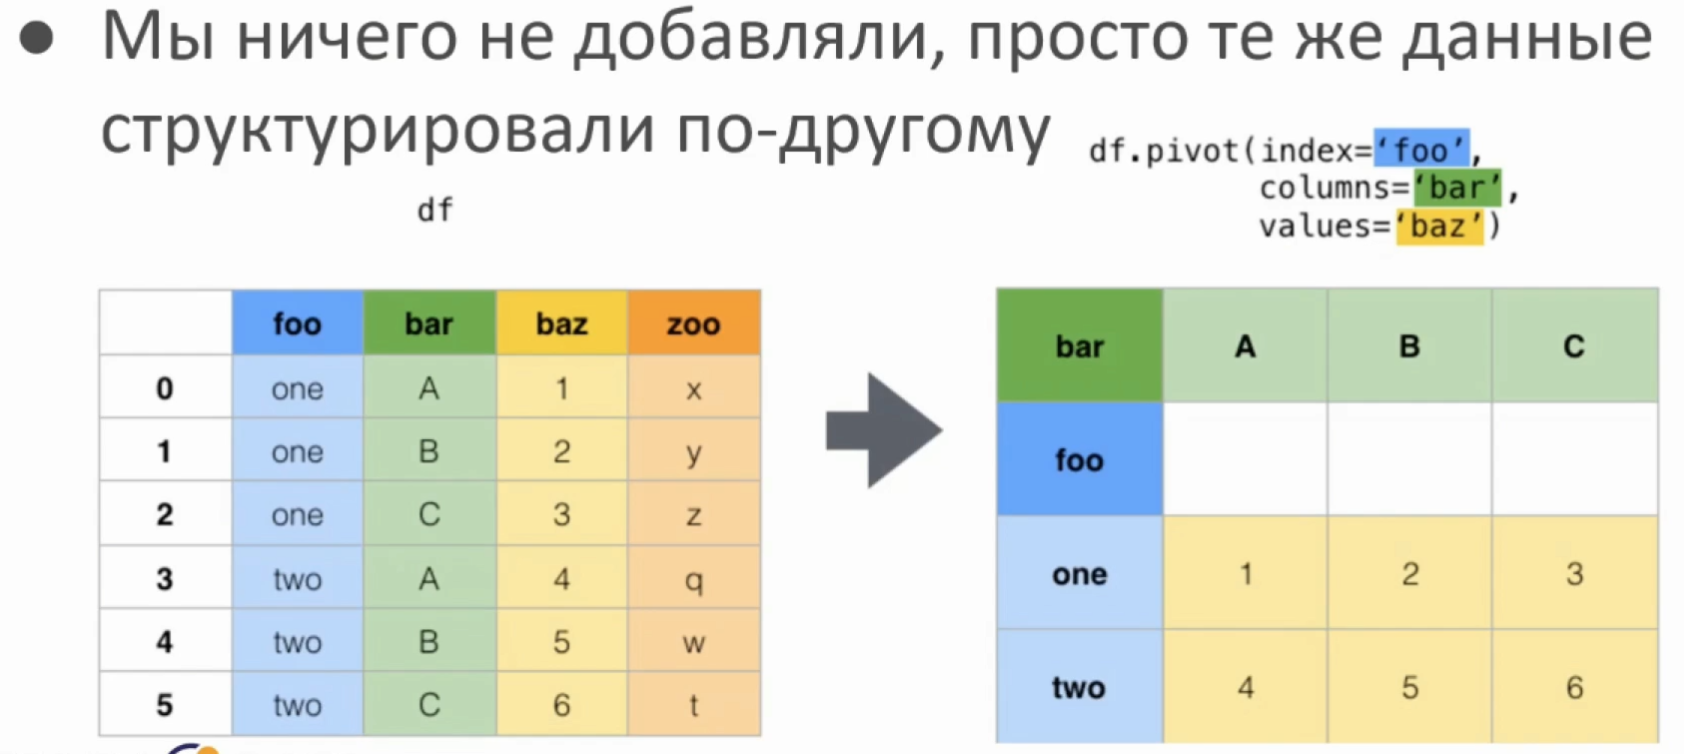

! Далеко не всегда нужно применять сводные таблицы 

Когда нужно применять метод pivot()? 

Прежде чем его применять, нужно самому себе ответить на вопросы ниже:

1) на какой вопрос хотим мы найти ответ?

2) как именно должен выглядеть df для ответа на этот вопрос?

3) как должна выглядеть результирующая сводная таблица? 

In [196]:
df = pd.read_csv('Sales_Funnel_CRM.csv')

df.head(10)

,Account Number,Company,Contact,Account Manager,Product,Licenses,Sale Price,Status
0,2123398,Google,Larry Pager,Edward Thorp,Analytics,150,2100000,Presented
1,2123398,Google,Larry Pager,Edward Thorp,Prediction,150,700000,Presented
2,2123398,Google,Larry Pager,Edward Thorp,Tracking,300,350000,Under Review
3,2192650,BOBO,Larry Pager,Edward Thorp,Analytics,150,2450000,Lost
4,420496,IKEA,Elon Tusk,Edward Thorp,Analytics,300,4550000,Won
5,636685,Tesla Inc.,Elon Tusk,Edward Thorp,Analytics,300,2800000,Under Review
6,636685,Tesla Inc.,Elon Tusk,Edward Thorp,Prediction,150,700000,Presented
7,1216870,Microsoft,Will Grates,Edward Thorp,Tracking,300,350000,Under Review
8,2200450,Walmart,Will Grates,Edward Thorp,Analytics,150,2450000,Lost
9,405886,Apple,Cindy Phoner,Claude Shannon,Analytics,300,4550000,Won


### Задача 1

Сколько лицензий на разные типы продуктов купила компания гугл? 

ИЛИ

В какие компании мы продали продукт GPS? 

In [197]:
# какие колонки нужны для ответа на вопрос?
# отберем в новый df необходимые колонки из исходного

task = df[['Company', 'Product', 'Licenses']]
task

,Company,Product,Licenses
0,Google,Analytics,150
1,Google,Prediction,150
2,Google,Tracking,300
3,BOBO,Analytics,150
4,IKEA,Analytics,300
5,Tesla Inc.,Analytics,300
6,Tesla Inc.,Prediction,150
7,Microsoft,Tracking,300
8,Walmart,Analytics,150
9,Apple,Analytics,300


In [198]:
# преобразуем наш df с помощью pivot()

pd.pivot(data = task, index = 'Company', columns = 'Product', values = 'Licenses')

# ОГОНЬ!!! 

Product,Analytics,GPS Positioning,Prediction,Tracking
Company,,,,
Google,150.0,NaN,150.0,300.0
ATT,NaN,NaN,150.0,150.0
Apple,300.0,NaN,NaN,NaN
BOBO,150.0,NaN,NaN,NaN
CVS Health,NaN,NaN,NaN,450.0
Cisco,300.0,300.0,NaN,NaN
Exxon Mobile,150.0,NaN,NaN,NaN
IKEA,300.0,NaN,NaN,NaN
Microsoft,NaN,NaN,NaN,300.0


### pivot_table()

Этот метод позволяет еще и применить дополнительную агрегаторную функцию 

при этом то же самое мж сделать и с помощью groupby()

### Задача 2

Найти суммарное кол-во лицензий и сумму продаж для каждой компании 

In [199]:
df

,Account Number,Company,Contact,Account Manager,Product,Licenses,Sale Price,Status
0,2123398,Google,Larry Pager,Edward Thorp,Analytics,150,2100000,Presented
1,2123398,Google,Larry Pager,Edward Thorp,Prediction,150,700000,Presented
2,2123398,Google,Larry Pager,Edward Thorp,Tracking,300,350000,Under Review
3,2192650,BOBO,Larry Pager,Edward Thorp,Analytics,150,2450000,Lost
4,420496,IKEA,Elon Tusk,Edward Thorp,Analytics,300,4550000,Won
5,636685,Tesla Inc.,Elon Tusk,Edward Thorp,Analytics,300,2800000,Under Review
6,636685,Tesla Inc.,Elon Tusk,Edward Thorp,Prediction,150,700000,Presented
7,1216870,Microsoft,Will Grates,Edward Thorp,Tracking,300,350000,Under Review
8,2200450,Walmart,Will Grates,Edward Thorp,Analytics,150,2450000,Lost
9,405886,Apple,Cindy Phoner,Claude Shannon,Analytics,300,4550000,Won


In [203]:
pd.pivot_table(data = df, index = 'Company', aggfunc = 'sum', values = ['Licenses', 'Sale Price'])

# в парметре values указываем только те колонки, ктр хотим оставить 

,Licenses,Sale Price
Company,,
Google,600,3150000
ATT,300,1050000
Apple,300,4550000
BOBO,150,2450000
CVS Health,450,490000
Cisco,600,4900000
Exxon Mobile,150,2100000
IKEA,300,4550000
Microsoft,300,350000


In [201]:
# эту же задачу мж решить и через groupby()
# выбор метода или pivot_table() или groupby() индивидуален 

df.groupby('Company')

In [202]:
df.groupby('Company').sum()

,Account Number,Licenses,Sale Price
Company,,,
Google,6370194,600,3150000
ATT,1396064,300,1050000
Apple,405886,300,4550000
BOBO,2192650,150,2450000
CVS Health,902797,450,490000
Cisco,4338998,600,4900000
Exxon Mobile,470248,150,2100000
IKEA,420496,300,4550000
Microsoft,1216870,300,350000


### Задача 3 

Для каждой пары: Менеджер продаж - контакт в компании узнать сумму продаж
    
(это задача на мультииндекс) 

In [204]:
pd.pivot_table(df, index = ['Account Manager', 'Contact'], values = ['Sale Price'], aggfunc = 'sum')

Sale Price
Account Manager Contact                 
Claude Shannon  Cindy Phoner     7700000
                Emma Gordian    12390000
Edward Thorp    Elon Tusk        8050000
                Larry Pager      5600000
                Will Grates      2800000

In [209]:
# можем также сделать доп детализацию через параметр columns
# посмотрим, какие конкретно продукты продались 

pd.pivot_table(df, index = ['Account Manager', 'Contact'], values = ['Sale Price'], fill_value = 0, columns = ['Product'], aggfunc = 'sum')

# если вместо NaN хотим более осмысленное значение, то есть параметр fill_value 

Sale Price                                    
Product                       Analytics GPS Positioning Prediction Tracking
Account Manager Contact                                                    
Claude Shannon  Cindy Phoner    6650000               0     700000   350000
                Emma Gordian   11550000          350000          0   490000
Edward Thorp    Elon Tusk       7350000               0     700000        0
                Larry Pager     4550000               0     700000   350000
                Will Grates     2450000               0          0   350000

In [210]:
pd.pivot_table(df, index = ['Account Manager', 'Contact'], values = ['Sale Price'], fill_value = 0, columns = ['Product'], aggfunc = ['sum', 'mean'])

# можно указать несколько агрегаторных функций 
# здесь уже будет многоуровневый мультииндекс (3 уровня)

sum                                      \
                             Sale Price                                       
Product                       Analytics GPS Positioning Prediction Tracking   
Account Manager Contact                                                       
Claude Shannon  Cindy Phoner    6650000               0     700000   350000   
                Emma Gordian   11550000          350000          0   490000   
Edward Thorp    Elon Tusk       7350000               0     700000        0   
                Larry Pager     4550000               0     700000   350000   
                Will Grates     2450000               0          0   350000   

                                   mean                                      
                             Sale Price                                      
Product                       Analytics GPS Positioning Prediction Tracking  
Account Manager Contact                                                      
Claude Shannon  Cindy Phoner    3325000               0     700000   350000  
                Emma Gordian    5775000          350000          0   490000  
Edward Thorp    Elon Tusk       3675000               0     700000        0  
                Larry Pager     2275000               0     700000   350000  
                Will Grates     2450000               0          0   350000

In [212]:
pd.pivot_table(df, index = ['Account Manager', 'Contact', 'Product'], 
               values = ['Sale Price'], 
               fill_value = 0, 
               aggfunc = 'sum', 
               margins = True)

# можно сделать в индексе сразу 3 уровня для лучшей читаемости
# + параметр margins делает внизу суммарную строку итогов 

Sale Price
Account Manager Contact      Product                    
Claude Shannon  Cindy Phoner Analytics           6650000
                             Prediction           700000
                             Tracking             350000
                Emma Gordian Analytics          11550000
                             GPS Positioning      350000
                             Tracking             490000
Edward Thorp    Elon Tusk    Analytics           7350000
                             Prediction           700000
                Larry Pager  Analytics           4550000
                             Prediction           700000
                             Tracking             350000
                Will Grates  Analytics           2450000
                             Tracking             350000
All                                             36540000